# Gastrulation

In [1]:
%load_ext autoreload

import os
import glob
import random
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd


## velocity estimation

In [2]:
# import celldancer.velocity_estimation as calc_velocity
import sys
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)
import pandas as pd
import sys
from plotting import gene as cdpl_gene
from plotting import gene as cdpl_cell
from plotting.colormap import *
from celldancer import velocity_estimation

In [8]:
raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv'
load_raw_data=pd.read_csv(raw_path)
load_raw_data

,gene_name,u0,s0,cellID,clusters,embedding1,embedding2
0,Sntg1,0.045809,0.000000,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,Sntg1,0.058600,0.000000,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,Sntg1,0.058696,0.000000,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,Sntg1,0.198549,0.000000,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,Sntg1,0.000000,0.000000,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...
7391995,Erdr1,0.461130,0.505213,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,Erdr1,0.643907,0.531752,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,Erdr1,0.626258,0.406073,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,Erdr1,0.409493,0.514864,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


In [3]:
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']

In [11]:
result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/polish/'
brief, load_cellDancer=velocity_estimation.train(load_raw_data,gene_choice=gene_list,result_path=result_path,n_jobs=8)

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/polish/cell_dancer_velocity_2022-04-28 12-37-28 as the output path.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation:   0%|                               | 0/28 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Velocity Estimation:   4%|▊     

## Set Parameters

In [9]:
n_neighbors=100
downsample_step=(60,60)

## Load detail

In [3]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail_2000_genes_with_bin_and_smooth.csv')
load_cellDancer=pd.read_csv(detail_file)

In [4]:
from compute_cell_velocity import compute_cell_velocity

gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              n_neighbors=n_neighbors,
              step=downsample_step)

(2000, 12329)
(2000, 12329)


/Users/pengzhizhang/cellDancer/src/compute_cell_velocity.py:141: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


In [5]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN


## Estimate pseudotime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Hi pseudotime
There are 2 clusters.
They are:  [0 1]



cluster  0
MAX allowed zero time cells are:  16
75  Cells left.
Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.0010118530718908622
Between dot 312  from refPath1 and dot 7 from refPath2.
now the cell time is updated for cluster:  0
shifting ref_path2 by time  305



cluster  0
MAX allowed zero time cells are:  16
41  Cells left.
Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.10822250593491728
Between dot 97  from refPath1 and dot 0 from refPath2.
now the cell time is updated for cluster:  0
shifting ref_path2 by time  97



cluster  0
MAX allowed zero time cells are:  16
Only  1  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  10
35  Cells left.
Sampling new trajectories for zero-time cells in cluster  1   ...
The closest distance i

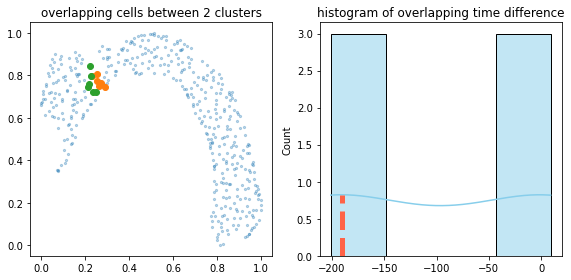

shift time is:  -197 .
The overlapping cells are: 
cell  164  from cluster  0  and  152  from cluster  1


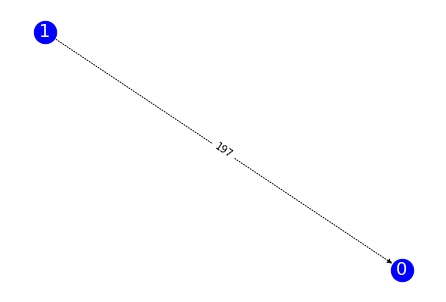

Backward: 0


All inter cluster cell time has been resolved.



There are 12329 cells.
--- 18.454237937927246 seconds ---


In [13]:
%load_ext autoreload
%autoreload 2
#from pseudo_time import pseudo_time


cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

In [14]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN,0.667516
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN,0.376688
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN,0.381465
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN,0.816943
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN,0.778153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN,0.956688
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN,0.985987
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN,0.963694
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN,0.964586


In [60]:
def plot_colormap(image):
    import numpy as np
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=(4, 2))
    plt.imshow(gradient, aspect=20, cmap=image.get_cmap())
    plt.axis('off')
    plt.show()

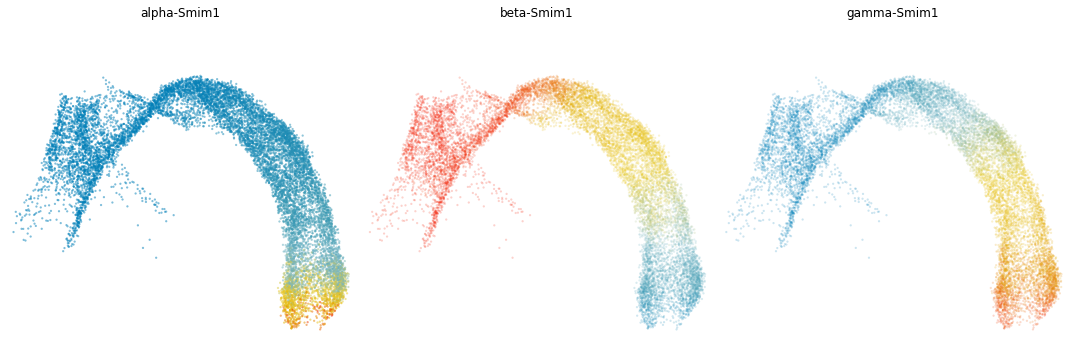

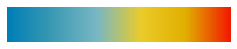

In [61]:
import cdplt
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Smim1'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

plot_colormap(im1)

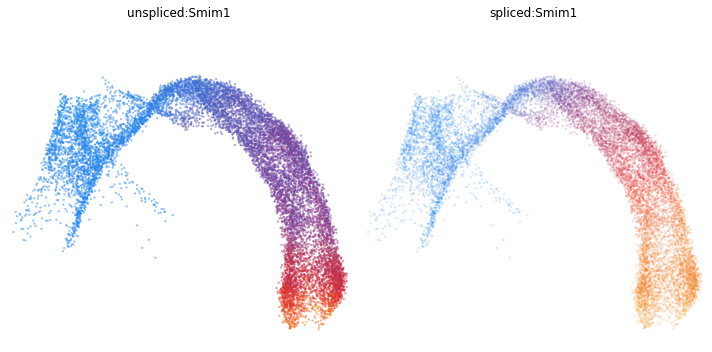

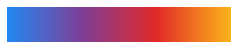

In [62]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Smim1'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

plot_colormap(im1)

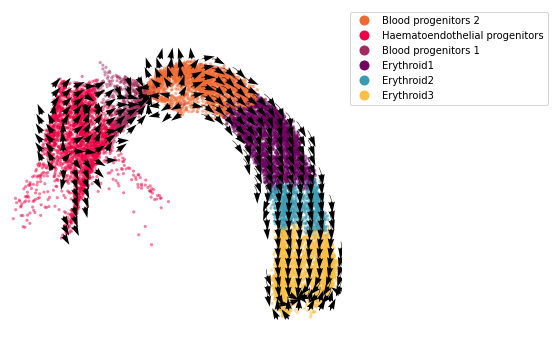

In [52]:
%autoreload 2

fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=clusters, alpha=0.5, s=10, 
             gene_name=gene, velocity=True, custom_xlim=(-5,11), custom_ylim=(4,18), legend='on')
ax.axis('off')
plt.show()

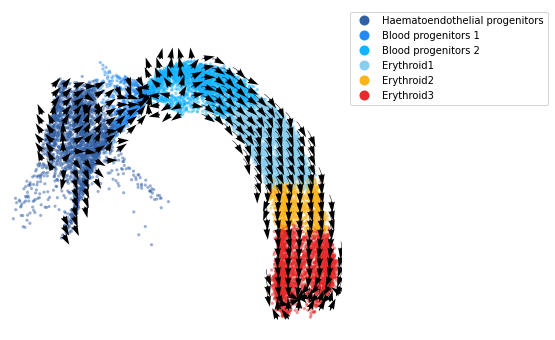

In [51]:
%autoreload 2
from plotting import colormap

fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=0.5, s=10,
             gene_name=gene, velocity=True, custom_xlim=(-5,11), custom_ylim=(4,18), legend='on')
ax.axis('off')
plt.show()

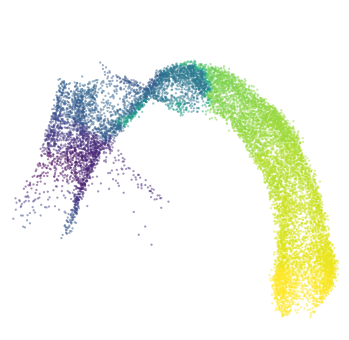

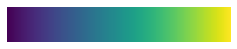

In [63]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

plot_colormap(im)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


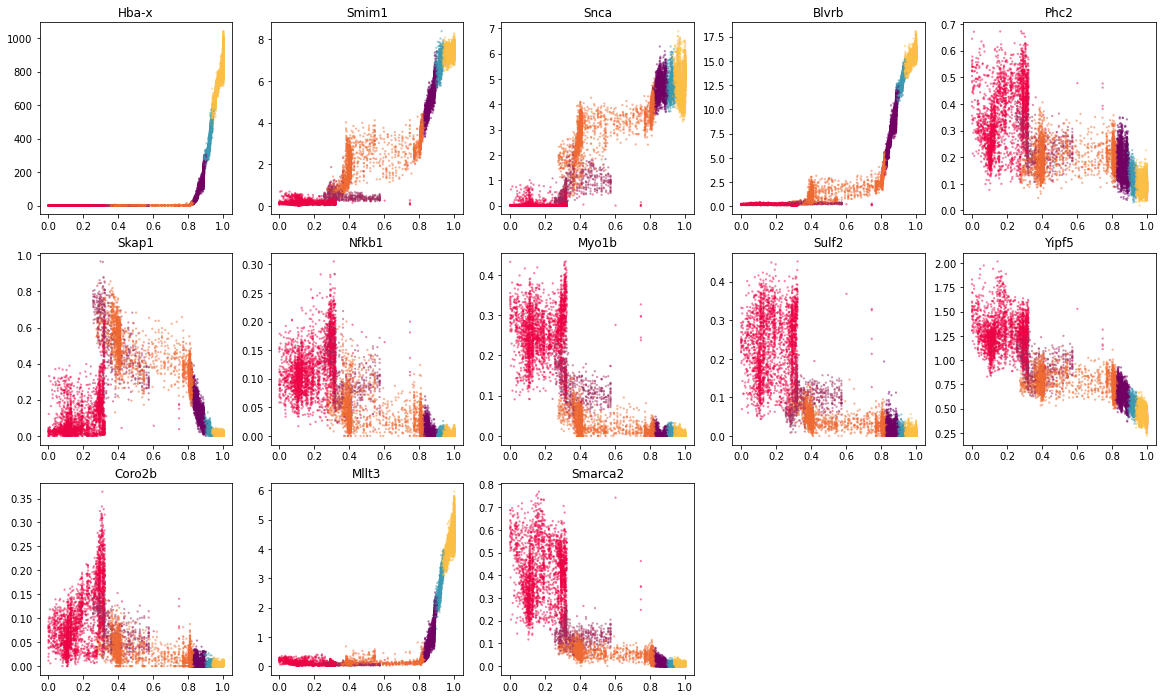

In [48]:
%autoreload 2

gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']
import math
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=clusters,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])

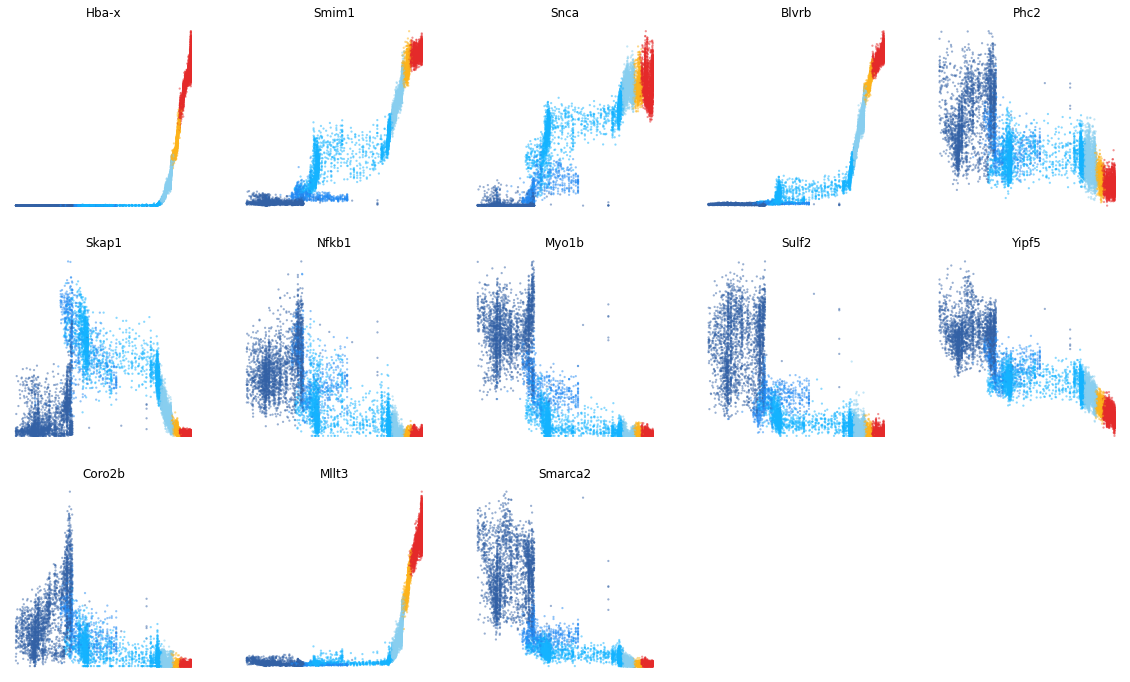

In [64]:
from plotting import colormap

# Show legend only
#_, ax = plt.subplots()
#cdplt.gene.scatter_gene(ax=ax,legend='only', colors=colormap.colormap_erythroid, s = 10, gene_name=None)
#ax.axis('off')
#plt.show()

ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

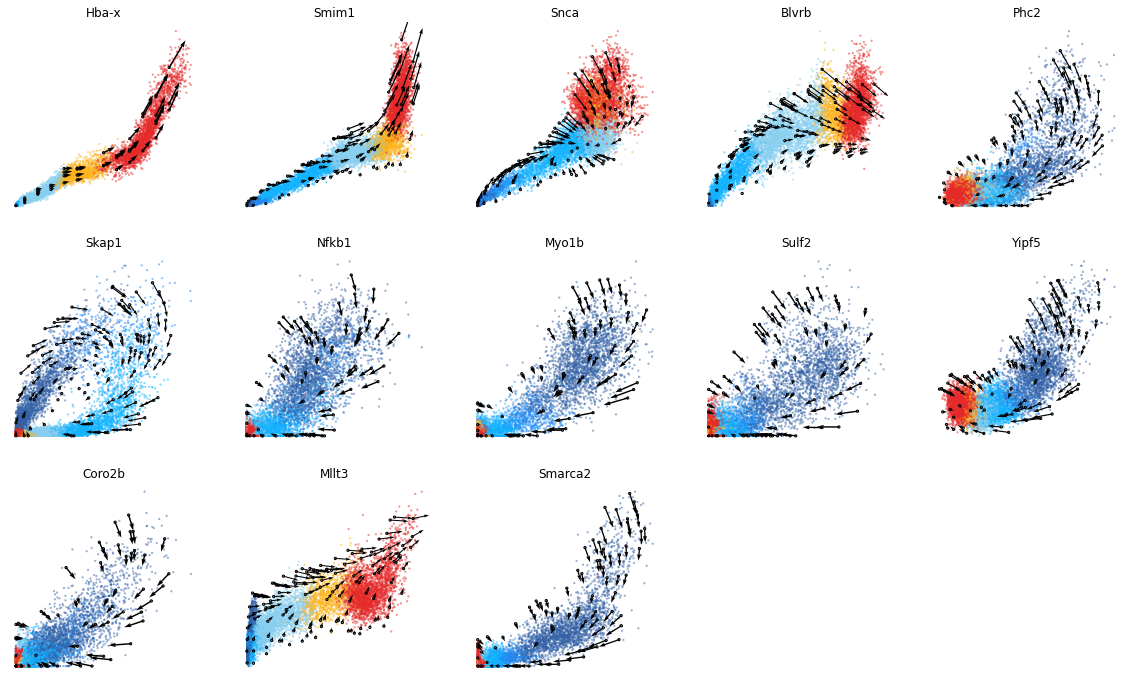

In [70]:
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

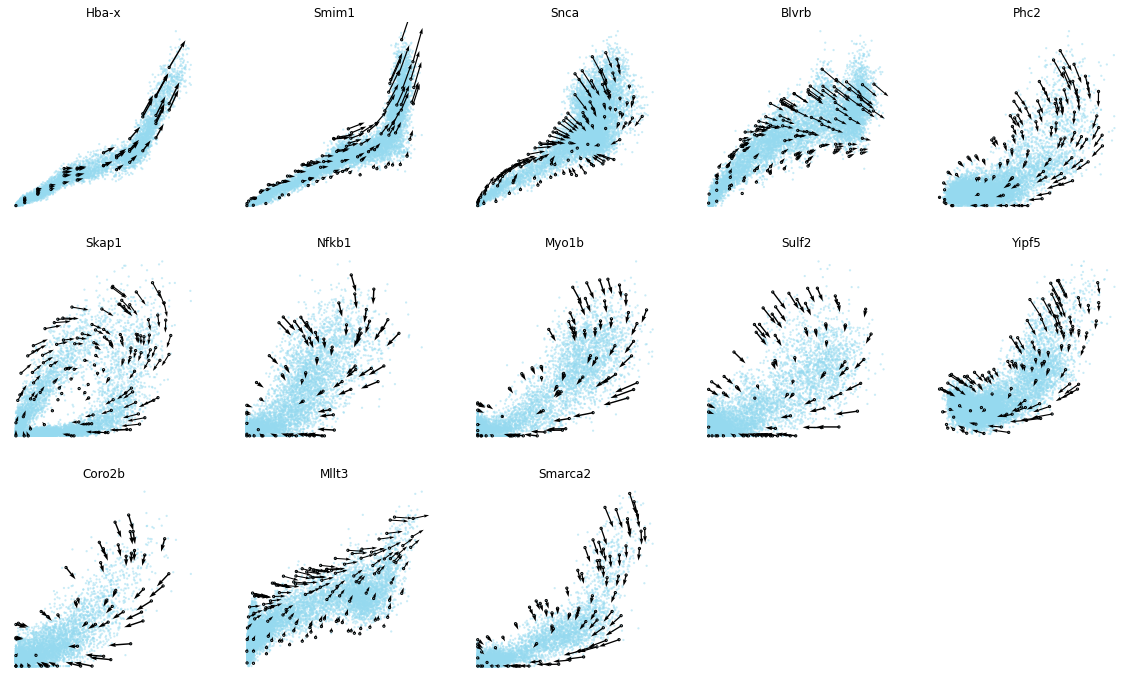

In [65]:
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


In [71]:
#!conda install -c pyviz holoviews bokeh -y
%%script echo "not yet working"
import pandas as pd 
import numpy as np
import os
import networkx as nx

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle
from colormap import *


celltime = pd.read_csv(os.path.join(output_path, output_name))
sub_celltime = celltime[celltime['sample']]

raw_data_path = '/Users/pengzhizhang/Documents/test_data/neuro/raw_data'
embedding_filename = 'denGyr_full.csv'
load_raw_data = pd.read_csv(os.path.join(raw_data_path, embedding_filename))

nsamples = len(sub_celltime)
cellembedding = load_raw_data[load_raw_data.gene_list == 
                          load_raw_data.gene_list[0]][['embedding1', 'embedding2', 'clusters']]

sub_cellembedding = cellembedding[celltime['sample']]
sub_data = pd.concat([sub_celltime, sub_cellembedding], axis=1)

def create_graph_KNN_based(data, n_neighbors, neighborhood_radius):
    from sklearn.neighbors import NearestNeighbors
    cell_embedding = data[['embedding1', 'embedding2']]
    neigh = NearestNeighbors(n_neighbors = n_neighbors, radius = neighborhood_radius)
    neigh.fit(cell_embedding)
    nn_graph = neigh.radius_neighbors_graph(cell_embedding)
    nn_array = nn_graph.toarray()
    edge_filter = np.triu(nn_array, k=1)
    
    # nn_array is effectively the edge list
    # Keep track of cells of 0 timeshift.
    ptime = data['pseudotime'].to_numpy()
    dtime = ptime - ptime[:,np.newaxis]
    
    INF = 1./np.min(np.abs(dtime[dtime!=0]))
    
    node_list = [(i, dict(ptime=data['pseudotime'].iloc[i], 
                          traj_cluster=data['traj_cluster'].iloc[i],
                          cluster=data['clusters'].iloc[i])) for i in range(nsamples)]
    
    # upper triangle of the knn array (i<j and nn_array[i,j] = 1)
    (i,j) = np.where(edge_filter != 0)
     
    # for forcedirected layouts, edge length is positively correlated with weight.
    # hence 1/dtime here as the weight
    # Created for directed graph
    edge_list = list()
    for a,b,w in zip(i,j, dtime[i,j]):
        if w>0:
            edge_list.append((a, b, 1/w))
        elif w<0:
            edge_list.append((a, b, -1/w))
        else:
            #print(a,b)
            edge_list.append((a, b, INF))
            
    G = nx.Graph()
    G.add_nodes_from(node_list)
    G.add_weighted_edges_from(edge_list)
    
    return G


def layout_graph(data, n_neighbors, neighborhood_radius):
    G = create_graph_KNN_based(data, n_neighbors, neighborhood_radius)
    nodes = sub_data[['embedding1', 'embedding2', 'pseudotime', 'clusters']].rename(
        {'embedding1': 'x', 'embedding2':'y'}, axis=1)
    nodes.reset_index(level=0, drop=True,inplace=True)
    nodes['index']=range(len(nodes))
    
    
    # NOTE!!!
    # the third column has to be "index"
    nodes = nodes[['x', 'y', 'index', 'clusters', 'pseudotime']]
    edges = pd.DataFrame([(i[0], i[1], G.edges[i]['weight']) for i in G.edges], 
                         columns=['source', 'target', 'weight'])
    
    forcedirected = forceatlas2_layout(nodes, edges, weight='weight', iterations=200, seed=10)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.scatter(forcedirected.x, forcedirected.y, c=data['clusters'].map(colors), s = 20, zorder=2)
    plt.axis('off')
    plt.show()
    return forcedirected, nodes, edges

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg), px=1, name=name)

def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(**cvsopts)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

cvsopts = dict(plot_height=400, plot_width=400)
colors = {'CA': grove2[7],
        'CA1-Sub': grove2[9],
        'CA2-3-4': grove2[8],
        'Granule': grove2[6],
        'ImmGranule1': grove2[6],
        'ImmGranule2': grove2[6],
        'Nbl1': grove2[5],
        'Nbl2': grove2[5],
        'nIPC': grove2[4],
        'RadialGlia': grove2[3],
        'RadialGlia2': grove2[3],
        'GlialProg': grove2[2],
        'OPC': grove2[1],
        'ImmAstro': grove2[0]}

forcedirected, nodes, edges = layout_graph(sub_data, 10, 5)

# %% [markdown]
# # Add edges
# # origin

# %%
fd_d = graphplot(forcedirected, connect_edges(forcedirected,edges), "Force-directed")
fd_b = graphplot(forcedirected, hammer_bundle(forcedirected,edges), "Force-directed, bundled") 

tf.Images(fd_d,fd_b).cols(2)

# %%
all_data = pd.concat([celltime, cellembedding], axis=1)

# Caution: this roughly takes 20+ minutes for 18140 cells.
forcedirected_all, nodes_all, edges_all = layout_graph(all_data, 10, 5)

# %%
tf.Images(nodesplot(forcedirected_all, "ForceAtlas2 layout"))

# %%
fig, ax = plt.subplots(figsize=(10,10))
#plt.plot(HB.x, HB.y, lw=0.1, c='lightblue', alpha = 1, zorder=1)
plt.scatter(forcedirected_all.x, forcedirected_all.y, c=all_data['clusters'].map(colors), s = 20, zorder=2)
plt.axis('off')
plt.show()

# %%
colors = {'CA': grove2[7],
        'CA1-Sub': grove2[9],
        'CA2-3-4': grove2[8],
        'Granule': grove2[6],
        'ImmGranule1': grove2[6],
        'ImmGranule2': grove2[6],
        'Nbl1': grove2[5],
        'Nbl2': grove2[5],
        'nIPC': grove2[4],
        'RadialGlia': grove2[3],
        'RadialGlia2': grove2[3],
        'GlialProg': grove2[2],
        'OPC': grove2[1],
        'ImmAstro': grove2[0]}
colormap = list(sub_data['clusters'].map(colors))

# %%
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

kwargs = dict(width=1000, height=1000, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

# %%
from holoviews.element.graphs import layout_nodes
layout_nodes(_graph, layout=nx.spring_layout, 
             kwargs={'weight':'weight', 'iterations':200, 'seed':100})

# %%
graph = hv.Graph((edges, forcedirected), label="neuro cell velocity")
graph.opts(node_size=3, edge_line_width=0.1,
            node_line_color='gray', 
            cmap=colors, node_color='clusters',
            edge_alpha=0.1, node_alpha=1)

# %%
%%time 
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(graph)
bundled

# %%
overlay = datashade(bundled, width=800, height=800) * bundled.select(pseudotime=(0,0.05))
overlay.opts(opts.Graph(node_size=10))

# %%
from bokeh.plotting import figure, output_notebook,reset_output, show
from bokeh.models import ColumnDataSource, Arrow, OpenHead, NormalHead, VeeHead

cds = ColumnDataSource(data=dict(x_start=[0,1, 2], y_start=[0,1, 2], x_end=[1,3, 5], y_end=[0,5, 8], line_width=[1]*3, color=['red','blue','yellow']))
arr = Arrow(end=NormalHead(), source=cds, line_color='color', line_width='line_width', x_start='x_start', y_start='y_start', x_end='x_end', y_end='y_end')



UsageError: Line magic function `%%script` not found.
